In [1]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

# Define a crosssection model

Select a crosssection model and pick a particle and target properties to limit the free parameters of the cross sections. 
Some parametrizations has more hyper parameters like for example the Photonuclear effect to specify which shadow modell should be selected. 
Informations can be found by reading the class docstring.
```
? pp.parametrization.pairproduction.KelnerKokoulinPetrukhin
```
All crosssections, except the ionization one, are defined componentwise. 
Ionization requires a medium because several ionization constants are required.

In [2]:
param = pp.parametrization.bremsstrahlung.KelnerKokoulinPetrukhin(False)
args = {
    "particle_def": pp.particle.MuMinusDef(),
    "component": pp.component.Hydrogen(),
}

# Kinematic Limits

The differential crosssections are evaluated in the kienmatic limits $(v_{min}, v_{max})$ and used as a limit for the utilities integrals. The paramerter $v$ represents the fraction of the energy the primary particle lose caused by the interaction.

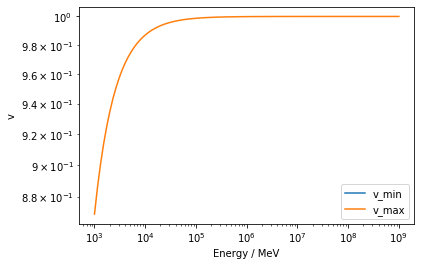

In [3]:
N_SUPPORT_POINTS = 100
energies = np.geomspace(1e3, 1e9, N_SUPPORT_POINTS)
v_mins, v_maxs = np.empty(N_SUPPORT_POINTS), np.empty(N_SUPPORT_POINTS)
for i, e in enumerate(energies):
    v_mins[i], v_maxs[i] = param.kinematic_limits(**args, energy=e)

fig = plt.figure()
ax = fig.add_subplot("111")
ax.plot(energies,v_mins, label="v_min")
ax.plot(energies, v_maxs, label="v_max")
ax.legend()
ax.set_xlabel("Energy / MeV")
ax.set_ylabel("v")
ax.set_yscale("log")
ax.set_xscale("log")

# Differential crosssection

Differential corsssection can be evaluated specify an energy $E$ and a fractional loss $v$.
Integration over the complet kinematic limits gives the total rate $dN/dX$ of the interaction.
The internal unit is based on grammage to take density profiles better into account. To get in units of $1/cm$ it has to multiplied by local mass density.

/home/msackel/.local/lib/python3.8/site-packages/matplotlib/contour.py:1523: RuntimeWarning: invalid value encountered in less_equal
  z = ma.masked_where(z <= 0, z)
<ipython-input-4-52b600b16995>:19: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(energyv,vv,diff_cross,  locator=locator)


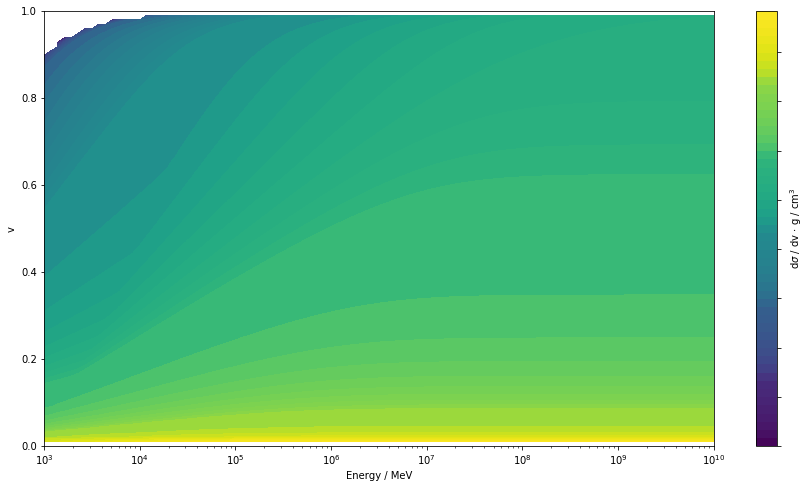

In [4]:
N_SUPPORT_POINTS_V, N_SUPPORT_POINTS_ENERGY  = 99, 99

vv, energyv = np.meshgrid(np.linspace(0,1,N_SUPPORT_POINTS_V), np.geomspace(1e3, 1e10, N_SUPPORT_POINTS_ENERGY))
diff_cross = np.empty(vv.shape)

for j in range(N_SUPPORT_POINTS_V):
    for i in range(N_SUPPORT_POINTS_ENERGY):
        diff_cross[i, j] = param.differential_crosssection(
            **args, energy=energyv[i, j], v=vv[i, j]
        )

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set_ylabel(r"v")
ax.set_xlabel("Energy / MeV")
locator = ticker.LogLocator(
   subs="all"
)
cs = ax.contourf(energyv,vv,diff_cross,  locator=locator)
cbar = fig.colorbar(cs, label="d$\sigma$ / dv $\cdot$ g / cm$^3$")
plt.xscale("log")

# Differential energy losses

Differential energy losses can be used by specifying a energy $E$ and a frational loss $v$. For propagation all losses which are smaller than an given will be summed up to a overall continuous loss and not handled stochastically. 

<ipython-input-5-cc2654ab3c24>:16: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(energyv, vv, loss,  locator=locator)


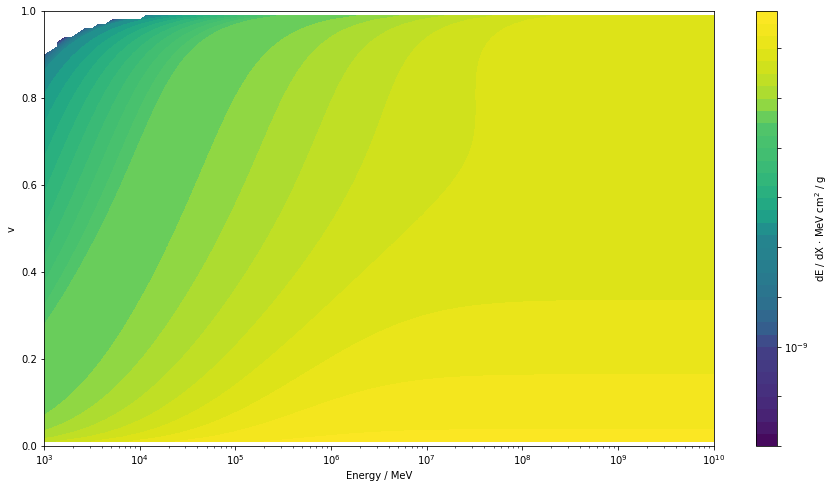

In [5]:
loss = np.empty(vv.shape)
for j in range(N_SUPPORT_POINTS_V):
    for i in range(N_SUPPORT_POINTS_ENERGY):
        loss[i, j] = param.dEdx_integrand(
            **args, energy=energyv[i, j], v=vv[i, j]
        )
        
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set_ylabel(r"v")
ax.set_xlabel("Energy / MeV")
locator = ticker.LogLocator(
    subs="all"
)

cs = ax.contourf(energyv, vv, loss,  locator=locator)
cbar = fig.colorbar(cs, label="dE / dX $\cdot$ MeV cm$^2$ / g")
plt.xscale("log")